In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sympy import *

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

init_printing(use_unicode=False, wrap_line=True)

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

# The Disturbing Function

We use the expansion developed in Mardling(2013), RM2013 for short. RM2013 develops two different expansions of the pertrubing part of the three body hamiltonian. The first expansion is in terms of spherical harmonics and is in principle exact in eccentricities and approximate in the ratio of semi-major axes. The second "principal" expansion is exact in the ratio of semi-major axes $\alpha=a_i/a_o$ and approximate in eccentricities, we use the first expansion here. The first expension has terms involving Hansen coefficients which are functions of the eccentricities and can in principle be calculated exactly. The expansion
uses Jacobi coordinates, symbols with subscript $i$ refere to the "inner binary" and those
with the subscript $o$ to the "outer binary".

The disturbing function has two parts, the secular part $\mathcal{R}_{sec}$ which doesn't depend on the fast varying longitudes and the resonant part $\mathcal{R}_{res}$. In our case, 
we neglect the secular part and concentrate on the single resonant term.

For the resonant part, we use only the dominant resonant (quadropole, i.e. $\propto\alpha^2$) term in case of the $n:1$ resonance. It is the term with $m=2$ in the RM2013 expansion.
Unfortunately there are no closed-form expressions for the Hansen coefficients and we can either calculate them numerically, or use a good enough series approximation, we opt for the latter. We can then write down the expression resonant part of the disturbing function.

The resonant part of the disturbing function for $m=2$ and $l=2$ is given by

$$\mathcal{R}_{res} = \frac{3}{4}\frac{G\mu_im_3}{a_o}\left(\frac{a_i}{a_o}\right)^2X^{2,2}_1(e_i)\,X^{-3,2}_{n'}(e_o)\cos(\lambda_i - n\lambda_o+\omega_i-(2-n)\omega_o)$$

Where $X^{2,2}_1(e_i)$ and $X^{-3,2}_{n'}(e_o)$ are Hansen coefficients which can be calculated as a series expansion in eccentricity to arbitrary order.

For reference, the secular part of the distrubing function to quadropole order is

$$\mathcal{R}_{sec} = \frac{G \mu_i a_{i}^{2} m_{3} \left(\frac{3 e_{i}^{2}}{2} + 1\right)}{4 a_{o}^{3} \left(- e_{o}^{2} + 1\right)^{\frac{3}{2}}}$$

## Calculating the Hansen coefficients

This is implemented in Mathematica because for some reason it can't be calculated in Sympy. Unfortunately, at this point we have to specify the order of the resonance because it is
not easy to calculate the Hansen coefficients for arbitrary $n$. 
For now, we choose $n=6$, which corresponds to a 6:1 resonance. The resulting 
coefficients are:

$$X^{2,2}_1(e_i) = -3e_i+\frac{13}{8}e_i^3+\frac{5}{192}e_i^5+\mathcal{O}(e_i^7)$$

$$X^{-3,2}_6(e_o)=\frac{533}{16}e_o^4-\frac{13827}{160}e_o^6+\frac{104127}{1280}e_o^8
+\mathcal{O}(e_i^{10})$$


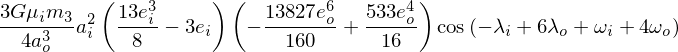

In [2]:
# Define symbols for orbital elements and constants
mu_i, mu_o, a_i, a_o, e_i, e_o, m3, n, G = \
symbols("\mu_i,\mu_o,a_i,a_o,e_i,e_o,m_3,n,G", positive=True, real=True)

R_sec, R_res, R = \
    symbols("\mathcal{R}_{sec}, \mathcal{R}_{res}, \mathcal{R}", real=True)
    
lambda_i, lambda_o, w_i, w_o = \
    symbols("\lambda_i, \lambda_o, \omega_i, \omega_o", real=True)

    
# Define Hensen coefficients for n=6    
X_in = -3*e_i + 13*e_i**3/8
X_ou = 533*e_o**4/16 - 13827*e_o**6/160

# Resonant part of the disturbing function
R_res = Rational(3,4)*G*mu_i*m3/a_o*(a_i/a_o)**2*X_in*X_ou\
*cos(6*lambda_o - lambda_i +4*w_o + w_i)

# Secular part of the disturbing function
# R_sec = G*mu_i*m3/(4*a_o)*(a_i/a_o)**2*(1 + 3*e_i**2/2)/(1 - e_o**2)**(Rational(3, 2))
R_res

The resonant part has a leading term of order $e_ie_o^4$, for now, we only keep the leading
term.

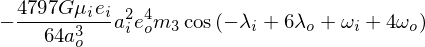

In [3]:
# R_sec = series(R_sec, e_o, 0, 5).removeO()
R_res = series(series(R_res, e_o, 0, 5).removeO(), e_i, 0, 2).removeO()

R = R_res
R

# Poincaré variables

Poincaré variables for the inner binary are defined as:

$$\lambda_i = \lambda_i,\quad \Lambda_i = \mu_i \sqrt{G m_{12} a_i} $$
$$\gamma_i = -\omega_i,\quad \Gamma_i = \mu_i \sqrt{G m_{12} a_i} (1-\sqrt{1-e_i^2})$$

Similarly, for the outer binary:

$$\lambda_o = \lambda_o,\quad \Lambda_o = \mu_o \sqrt{G m_{123} a_o}$$
$$\gamma_o = -\omega_o,\quad \Gamma_o = \mu_o \sqrt{G m_{123} a_o} (1-\sqrt{1-e_o^2})$$

We can solve the above system to obtain the expression for the orbital elements expressed in terms of Poincaré momenta. Since the new coordinates and momenta are functions of both the previous momenta and the coordinates,  it is known from the literature that this transformation is canonical.

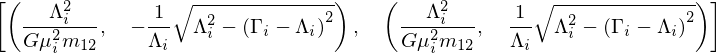

In [4]:
# Define Poincaré variables
Lambda_i, Gamma_i, Lambda_o, Gamma_o, m12, m123 =\
    symbols("\Lambda_i, Gamma_i, \Lambda_o, Gamma_o, m_{12}, m_{123}",
              real=True, positive=True)  
gamma_o, gamma_i = symbols("\gamma_o, \gamma_i", real=True)
    
# Solve for orbital elements in terms of Poincaré variables
x = solve([Eq(mu_i*sqrt(G*m12*a_i) - Lambda_i),
           Eq(mu_i*sqrt(G*m12*a_i)*(1 - sqrt(1 - e_i**2)) - Gamma_i)],
        [a_i, e_i])

x

The second solution is phyiscally meaningful because $e$ is defined to be positive. 
Therefore, the orbital elements in terms of Poincare coordinates are given by:

$$a_i = \frac{\Lambda_i^{2}}{G \mu_i^{2} m_{12}}\quad e_i = \frac{1}{\Lambda_i} \sqrt{\Lambda_i^{2} - \left(\Gamma_{i} - \Lambda_i\right)^{2}}$$

and for the outer part:

$$a_o = \frac{\Lambda_o^{2}}{G \mu_o^{2} m_{123}}\quad e_o = \frac{1}{\Lambda_o} \sqrt{\Lambda_o^{2} - \left(\Gamma_{o} - \Lambda_o\right)^{2}}$$

we can now write the Disturbing function in Poincaré variables:

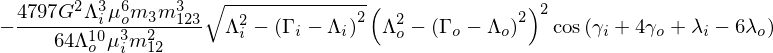

In [5]:
# Disturbing function in Poincaré coordinates
R = R.subs({a_i: Lambda_i**2/(G*mu_i**2*m12),
            e_i: sqrt(Lambda_i**2 - (Gamma_i - Lambda_i)**2)/Lambda_i,
            a_o: Lambda_o**2/(G*mu_o**2*m123),
            e_o: sqrt(Lambda_o**2 - (Gamma_o - Lambda_o)**2)/Lambda_o,
            w_i: -gamma_i,
            w_o: -gamma_o})
R

# The complete Hamiltonian 

## Keplerian terms

The complete Hamiltonian of the three body system is given by 

$$\mathcal{H}=\mathcal{H}_{kepler}-\mathcal{R}$$

where $\mathcal{H}_{kepler}$ is the Keplerian part.

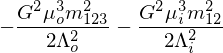

In [6]:
# Define Keplerian hamiltonian in Poincaré coordinates
H = Symbol('\mathcal{H}', real=True)
H_k = Symbol('mathcal{H}_{Kepler}', real=True)
H_k = - G**2*m12**2*mu_i**3/(2*Lambda_i**2) - G**2*m123**2*mu_o**3/(2*Lambda_o**2)
H_k

$$\mathcal{H}_{Kepler}=- \frac{G^{2} \mu_o^{3} m_{123}^{2}}{2 \Lambda_o^{2}} - \frac{G^{2} \mu_i^{3} m_{12}^{2}}{2 \Lambda_i^{2}}$$

Since we're interested in behaviour close to resonance, we can expanded the Keplerian Hamiltonain in a series around a $\Lambda$ wchich corresponds to exact resonance, we denote this value of $\Lambda$ as $\tilde{\Lambda}$.

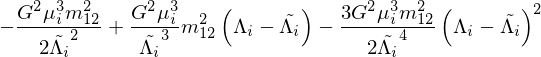

In [7]:
LLambda_o, LLambda_i  =\
symbols(r"\tilde{\Lambda_o}, \tilde{\Lambda_i}", real=True, positive=True)

series(H_k.args[0], Lambda_i, LLambda_i, 3).removeO()

We define new momenta $J_1=\Lambda_i - \tilde{\Lambda_i}$ and 
$J_2=\Lambda_o - \tilde{\Lambda_o}$. The keplerian Hamiltonian is then given by

$$\mathcal{H}_{K}=\frac{G^2 \mu_i^3 m_{12}^2}{2\tilde{\Lambda_i}^3}J_1 -\frac{3 G^2 \mu_i^3 m_{12}^2}{2\tilde{\Lambda_i}^4}J_1^2+ \frac{G^2 \mu_o^3 m_{123}^2}{2\tilde{\Lambda_o}^3}J_2 -\frac{3 G^2 \mu_o^3 m_{123}^2}{2\tilde{\Lambda_o}^4}J_2^2 + const.$$

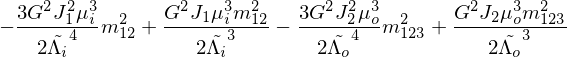

In [8]:
J1, J2 = symbols(r"J_1 J_2", real=True)

ci = G**2*mu_i**3*m12**2
co = G**2*mu_o**3*m123**2

# Expanded Keplerian Hamiltonian
H_kexp = ci*J1/(2*LLambda_i**3) + co*J2/(2*LLambda_o**3) -3*ci*J1**2/(2*LLambda_i**4)\
    -3*co*J2**2/(2*LLambda_o**4)
H_kexp

## Resonant term

We expand the resonant part of the hamiltonian to lowest order in $\Gamma_i$ and 
$\Gamma_o$. The resulting function is proportional to

$$\mathcal{R}\propto \sqrt{\Gamma_i}{\Gamma_o^2} + \mathcal{O}(\Gamma_i, \Gamma_o^3)$$

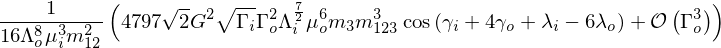

In [9]:
H_res = -R

simplify(series(series(H_res, Gamma_i, 0, 1).removeO(), Gamma_o, 0, 3))

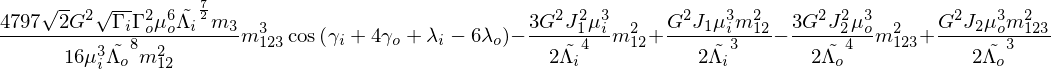

In [10]:
H_res = series(series(H_res, Gamma_i, 0, 1).removeO(), Gamma_o, 0, 3).removeO()
simplify(H_res)
H_res = H_res.subs({
    Lambda_i: LLambda_i,
    Lambda_o: LLambda_o
})

H = H_res + H_kexp
H

## Nondimensionalization

Now that we have the complete Hamiltonian, it is useful to remove physical units.
We proceed by rescaling all masses by a factor $m'$, lengths by factor $a'$.
G is factorized out of the definitions of Poincaré and $J_1$ and
$J_2$ momenta. 

$$\hat{m}_{12}=\frac{m_{12}}{m'}\quad \hat{m}_{123}=\frac{m_{123}}{m'}
\quad \hat{a}_{i}=\frac{a_{i}}{a'}\quad\hat{a}_{o}=\frac{a_{o}}{a'}\quad$$


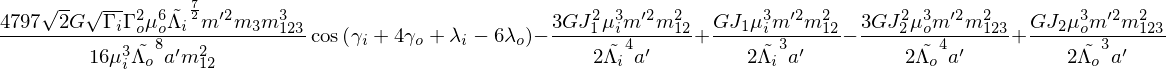

In [11]:
m, a = symbols("m' a'", positive=True)
H = H.subs({
    J1: m*sqrt(G*a*m)*J1,
    J2: m*sqrt(G*a*m)*J2,
    Gamma_i: m*sqrt(G*a*m)*Gamma_i,
    Gamma_o: m*sqrt(G*a*m)*Gamma_o,
    LLambda_i: m*sqrt(G*a*m)*LLambda_i,
    LLambda_o: m*sqrt(G*a*m)*LLambda_o,
    mu_i: m*mu_i,
    mu_o: m*mu_o,
    m12: m*m12,
    m123: m*m123,
    m3: m*m3
})
H

Next, we multiply the Hamiltonian by $a/M^2G$ which makes it dimensionless.We put mass in units of the inner binary
mass, length in units of the inner binary semi-major axis at exact resonance, 
and time in units of the inner
binary inverse mean motion.

$$m'=m_{12}\quad a'=\tilde{a_i}$$

therefore, we have $m_{12}$=1, $m_{123}\approx m_{12}=1$ and $\mu_o\approx m_3$.

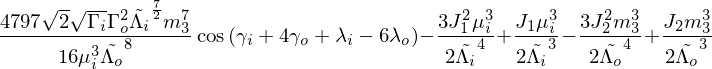

In [12]:
H = H.subs({
    mu_o: m3,
    m12: 1,
    m123: 1,
})
H = H*a/(G*m**2)
simplify(H)

The Hamiltonian is now in a dimensionless form, the Poincaré momenta are defined as follows.

$$ \Lambda_i = \mu_i \sqrt{a_i} \quad \Lambda_o = m_3 \sqrt{ a_o}$$
$$\Gamma_i = \mu_i \sqrt{a_i} (1-\sqrt{1-e_i^2})\quad \Gamma_o = m_3 \sqrt{ a_o} (1-\sqrt{1-e_o^2})$$

where all the quantities are dimensionless (hats omitted).

The final Hamiltonian is then given by:

$$\hat{\mathcal{H}}= -\frac{3 J_1^2\mu_i^3}{2\widetilde{\Lambda}_i^4}+\frac{J_1\mu_i^3}{2\widetilde{\Lambda}_i^3}-\frac{3 J_2^2 m_3^3}{2\widetilde{\Lambda}_o^4}
+\frac{J_2m_3^3}{2\widetilde{\Lambda}_o^3} + 
\frac{4797\sqrt{2}}{16}\frac{m_3^7\widetilde{\Lambda}_i^{7/2}} {\mu_i^3\widetilde{\Lambda}_o^{8}}\sqrt{\Gamma_i}\Gamma_o^2\cos{(\gamma_i+4\gamma_o
+\lambda_i-6\lambda_o)}$$

Where the hat denotes the fact that the Hamiltonian is dimensionless.

# Reduction to a single degree of freedom

In order to reduce the above Hamiltonian to a single degree of freedom, we make use of a canonical transformation which uses the harmonic angle as one of the new conjugate positions. The transformation is of the form:

$$(\lambda_i, \lambda_o,\gamma_i, \gamma_o, J_1, J_2, \Gamma_i, \Gamma_o)
\rightarrow(\theta_1, \theta_2, \theta_3, \theta_4, \Theta_1, \Theta_2, \Theta_3, \Theta_4)$$

it is generated by the generating function of the 2nd type defined below.

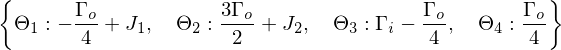

In [13]:
# Define new coordinates and momenta
t1, t2, t3, t4, T1, T2, T3, T4 =\
symbols(r"\theta_1, \theta_2, \theta_3, \theta_4, \Theta_1, \Theta_2, \Theta_3, \Theta_4",
        real=True)

# Specify F2
F2 = (gamma_i + 4*gamma_o + lambda_i - 6*lambda_o)*T4 + lambda_i*T1 + lambda_o*T2\
    + gamma_i*T3

H = H.subs({
    J1: diff(F2, lambda_i),
    J2: diff(F2, lambda_o),
    Gamma_i: diff(F2, gamma_i),
    Gamma_o: diff(F2, gamma_o),
    gamma_i: t4 -(4*gamma_o + lambda_i - 6*lambda_o)
})

# Solve for new momenta in terms of old momenta
sol = solve([
    Eq(diff(F2, lambda_i) - J1),
    Eq(diff(F2, lambda_o) - J2),
    Eq(diff(F2, gamma_i) - Gamma_i),
    Eq(diff(F2, gamma_o) - Gamma_o)], [T1, T2, T3 ,T4])
sol

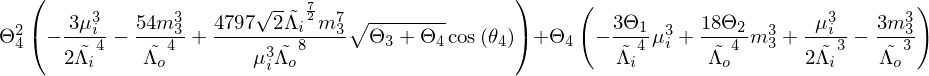

In [14]:
H = collect(expand(H), T4).args[0] + collect(expand(H), T4).args[1]
H

The square root next to the cosine term is problematic, we thus use the approximation $\Theta_1\ll\Theta_2$. This approximation relies on the fact that $\Gamma_o/\Gamma_i$ is small which is true only if $m_3$ is small compared to $m_1$ and $m_2$ and if $e_o<e_i$. The approximation breaks down when the outer eccentricty surpasses the inner.

Substituting $\Phi\equiv\Theta_4$ and $\phi\equiv\theta_4$, expanding 
$\sqrt{\Theta_3 + \Theta_4}\approx \sqrt{\Theta_3}$, and dividing by the factor 

$$-\frac{3\mu_i^3}{2\widetilde{\Lambda}_i^4}-\frac{54 m_3^3}{\widetilde{\Lambda}_o^4}$$

we obtain the following Hamiltonian

$$\hat{\mathcal{H}}= \left(-\frac{3\mu_i^3}{2\widetilde{\Lambda}_i^4}-\frac{54 m_3^3}{\widetilde{\Lambda}_o^4}\right)\Phi^2
+ \left(\frac{\mu_i^3}{2\widetilde{\Lambda}_i^3} - 
\frac{3m_3^3}{\widetilde{\Lambda}_o^3} + 
\frac{18\Theta_2m_3^3}{\widetilde{\Lambda}_o^4} - 
\frac{3\Theta_1\mu_i^3}{\widetilde{\Lambda}_i^4}\right)\Phi
+\frac{4797\sqrt{2}}{16}\frac{m_3^7\widetilde{\Lambda}_i^{7/2}} {\mu_i^3\widetilde{\Lambda}_o^{8}}\sqrt{\Theta_3}\Phi^2\cos{\phi}$$

or simply

$$\hat{\mathcal{H}}=-\alpha\Phi^2  -\beta\Phi +
\frac{4797\sqrt{2}}{16}\frac{m_3^7\widetilde{\Lambda}_i^{7/2}} {\mu_i^3\widetilde{\Lambda}_o^{8}}\sqrt{\Theta_3}\Phi^2\cos{\phi}$$

where

$$\alpha=\frac{3\mu_i^3}{2\widetilde{\Lambda}_i^4} +
\frac{54m_3^3}{\widetilde{\Lambda}_o^4}$$

and

$$\beta \approx -\frac{\mu_i^3}{2\widetilde{\Lambda}_i^3} +
\frac{3m_3^3}{\widetilde{\Lambda}_o^3} $$


By using the canonical transformation $\Phi\rightarrow \Phi/4$
and $\phi\rightarrow 4\phi$, and dividing by $-\alpha/16$  we obtain


$$\hat{\mathcal{H}}' = \Phi^2 + \delta\Phi - \epsilon\Phi^2\cos{4\phi}$$

where 

$$\delta=\frac{4\beta}{\alpha},\quad
\epsilon=\frac{4797\sqrt{2}}{16}\frac{m_3^7\widetilde{\Lambda}_i^{7/2}} {\alpha\mu_i^3\widetilde{\Lambda}_o^{8}}\sqrt{\Theta_3}$$

# Analysis of bifurcation points

The final canonical transformation is to polar coordinates of the form

$$x=\sqrt{2\Phi}\cos{\phi}\quad y=\sqrt{2\Phi}\sin{\phi}$$

It follows that 

$$\Phi =\frac{x^2 +y^2}{2}$$

and

$$\cos{4\phi}=8\cos^4{\phi}-8\cos^2{\phi}+1$$ 

where $\cos{\phi}=x/\sqrt{x^2+y^2}$.

In [15]:
expand_trig(cos(4*t1))

We can gain insight into the structure of the phase space by looking at the fixed points of the Hamiltonian. The fixed points can be found by solving the following system of equations.

$$\dot{\phi}=\frac{\partial{\mathcal{H}}}{\partial \Phi}=0$$

$$\dot{\Phi}=\frac{\partial{\mathcal{H}}}{\partial \phi}=0$$

differentiating the Hamiltonian results in the following system

$$2\Phi + \delta + 2\epsilon\cos(4\phi)=0$$

$$\epsilon\Phi^2\sin(4\phi)=0$$

In [16]:
Phi, phi, delta, eps = symbols(r"Phi, phi, \delta, \epsilon", real=True)

H_prim = -Phi**2*eps*cos(4*phi) + Phi**2 + delta*Phi
H_prim

The 2nd equation is satisfied if $4\phi=k\pi$ where $k$ is an interger. It follows that the critical points are located at 

$$\Phi_{fix}=\frac{-\delta}{2(1 - \epsilon\cos4\phi_{fix})}$$

where

$$\phi_{fix}=\left\{0,\frac{\pi}{4}, \frac{\pi}{2}, \frac{3\pi}{4},
\pi, \frac{5\pi}{4}, \frac{3\pi}{2}, \frac{7\pi}{4}\right\}$$

Next, we introduce a canonical transformation to polar coordinates

$$x=\sqrt{2\Phi}\cos{\phi}\quad y=\sqrt{2\Phi}\sin{\phi}$$

We see that there are 8 distinct fixed points, with $x\propto\pm \sqrt{-\delta}$ 
(same for $y$). It's useful to plot the plot the bifurcation diagram, showing the position of these points on say the x axis as a function of $\delta$.

/home/fran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


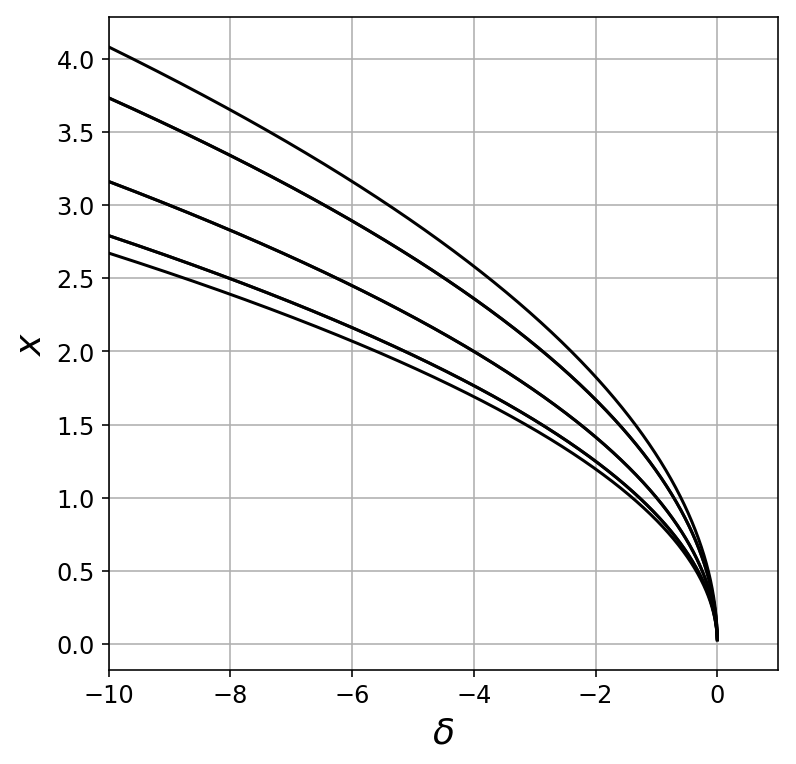

In [17]:
eps_ = .4 # some random value
delta_ = np.linspace(-10, 10, 10000)

phi_ = np.pi*np.arange(0, 8)/4

fig, ax = plt.subplots(figsize=(6,6))

for i, val in enumerate(phi_):
    ax.plot(delta_, np.sqrt(-delta_/(1 - eps_*np.cos(val))), color='black')

ax.set_xlim((-10,1))
# ax.set_ylim(0, 2.4)
ax.grid(True)
ax.set_xlabel(r'$\delta$')
ax.set_ylabel(r'$x$')

### Stability of the fixed points


In order to characterise the fixed points of a two dimensional system of first order
differential equations, we look at the linearized system near the fixed points.
Suppose that $\dot{x}_i=f_i(x)$ and $x=a$ is a fixed point, so $f(a)=0$. We can then taylor expand $f$ as follows

$$\dot{x}_i=f_i(a)+\frac{\partial f_i}{\partial x_j}(a)\xi_j + \mathcal{O}(\xi^2)$$

where $\xi=x-a$. It follows that

$$\dot{\xi}=A\xi$$

is the linearized system evaluated at the fixed point $a$. A is called the Jacobian matrix. 

For Hamiltonian systems with a single degree of freedom we can only have three types
of fixed points because
of conservation of phase space volume (Liouville's theorem). They are
\emph{hyperbolic} (saddle points), \emph{elliptic} (centre point) and 
\emph{parabolic} (shear point) (see http://www.augustana.ab.ca/~hackw/mat332/exhibit/fxdpt2d.html).

Therefore, we calculate the Jacobian matrix for Hamilton's equation, that is, the Hessian
matrix for the Hamiltonian itself and evaluate it at the fixed points.

In [18]:
M11 = diff(diff(H_prim, Phi), Phi)
M12 = diff(diff(H_prim, Phi), phi)
M21 = diff(diff(H_prim, phi), Phi)
M22 = diff(diff(H_prim, phi), phi)
lambda_ = symbols(r"\lambda")
eigenvalues = solve((M11 - lambda_)*(M22 - lambda_) - M12*M21, lambda_)
eigen_1 = eigenvalues[0]
eigen_2 = eigenvalues[1]

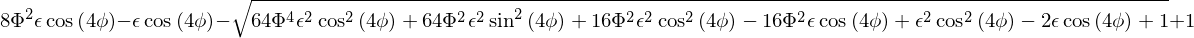

In [19]:
eigen_1

In [21]:
d = -5
epsilon = .1

for i, a in enumerate(phi_):
    eigen1 = eigen_1.subs({eps: e,
                        phi:phi_[i],
                        Phi: -d/(2 - 2*eps*np.cos(4*0))}).evalf()
    eigen2 = eigen_2.subs({eps: .5,
                        phi:phi_[i],
                        Phi: -d/(2 - 2*eps*np.cos(4*0))}).evalf()
    print(eigen1, eigen2)

1.02030405060708 200.000000000000
-1.02030405060708 3.00000000000000
1.02030405060708 200.000000000000
-1.02030405060708 3.00000000000000
1.02030405060708 200.000000000000
-1.02030405060708 3.00000000000000
1.02030405060708 200.000000000000
-1.02030405060708 3.00000000000000
